# **Simulasi Gerak Peluru dengan Hambatan Udara**

Sebuah peluru ditembakkan dengan kecepatan awal $vo$ dan sudut θ terhadap horizontal.  Pada kenyataannya, udara memberikan gaya hambat yang arahnya berlawanan dengan arah kecepatan. Gaya hambat dapat dimodelkan sederhana sebagai:

$\vec{F}_d = -k\vec{v} $

dengan $k$ adalah konstanta gesek udara *(drag coefficient)*.  Maka, persamaan geraknya:

$ m \frac{d\vec{v}}{dt} = \vec{F}_g + \vec{F}_d$.

Sehingga, percepatan di arah horizontal dan vertikal berturut-turut:

$\frac{dv_x}{dt}= -\frac{k}{m}v_x$

$ \frac{dv_y}{dt}= -g-\frac{k}{m}v_y$








In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def velocity(vx, vy, k, m, g, dt):
    ax = - (k/m) * vx
    ay = -g - (k/m) * vy


    vx_new = vx + ax * dt
    vy_new = vy + ay * dt
    return vx_new, vy_new, ax, ay

def position(x, y, vx, vy, dt):
    return x + vx * dt, y + vy * dt

def projectile(v0, theta_deg, k, m, g=9.8, dt=0.01):
    theta = math.radians(theta_deg)
    vx, vy = v0 * math.cos(theta), v0 * math.sin(theta)
    x, y = 0.0, 0.0
    t = 0.0

    xs, ys, vxs, vys, axs, ays, ts = [x], [y], [vx], [vy], [], [], [t]

    while y >= 0:
        vx, vy, ax, ay = velocity(vx, vy, k, m, g, dt)
        x, y = position(x, y, vx, vy, dt)
        t += dt

        xs.append(x)
        ys.append(y)
        vxs.append(vx)
        vys.append(vy)
        axs.append(ax)
        ays.append(ay)
        ts.append(t)

    return xs, ys, vxs, vys, axs, ays, ts





**Perbandingan gerak parabola tanpa hambatan udara dan $k= 0.05$**

v0 = 50 m/s

theta_deg = 45

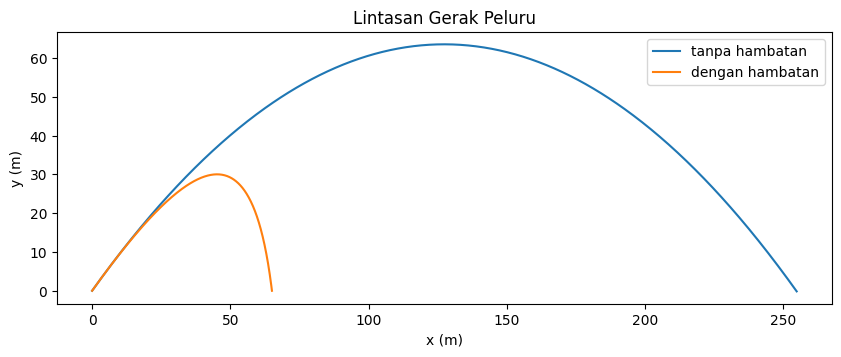

In [ ]:
x_no_drag, y_no_drag, vx_no_drag, vy_no_drag, ax_no_drag, ay_no_drag, t_no_drag = projectile(50, 45, 0, 0.1)
x_drag, y_drag, vx_drag, vy_drag, ax_drag, ay_drag, t_drag = projectile(50, 45, 0.05, 0.1)


plt.figure(figsize=(10, 12))

plt.subplot(3,1,1)
plt.plot(x_no_drag, y_no_drag, label='tanpa hambatan')
plt.plot(x_drag, y_drag, label='dengan hambatan')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Lintasan Gerak Peluru')
plt.legend()

### **Pertanyaan**
1. Mengapa lintasan gerak peluru tanpa hambatan udara berbentuk parabola sempurna dan simetris?
2. Bandingkan bentuk lintasan peluru dengan dan tanpa hambatan udara. Mengapa lintasan dengan hambatan tidak simetris?
3. Mengapa peluru dengan hambatan udara memiliki jarak jangkau yang lebih pendek daripada tanpa hambatan?



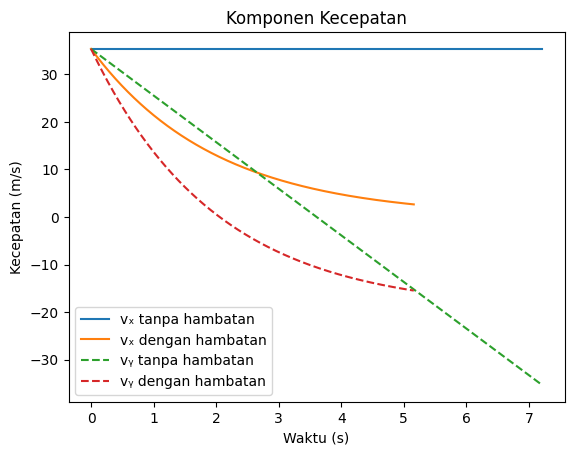

In [ ]:
# Plot kecepatan vx, vy
#plt.subplot(3,1,2)
plt.plot(t_no_drag, vx_no_drag, label='vₓ tanpa hambatan')
plt.plot(t_drag, vx_drag, label='vₓ dengan hambatan')
plt.plot(t_no_drag, vy_no_drag, '--', label='vᵧ tanpa hambatan')
plt.plot(t_drag, vy_drag, '--', label='vᵧ dengan hambatan')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan (m/s)')
plt.title('Komponen Kecepatan')
plt.legend()

### **Pertanyaan**
1. Bandingkan kecepatan di sumbu horizontal dan vertikal untuk kasus gerak peluru dengan dan tanpa hambatan udara. Mengapa kecepatan vertikal dan horizontal pada gerak peluru dengan hambatan tidak linear?
2. Bagaimana cara anda memvalidasi program yang anda buat benar?

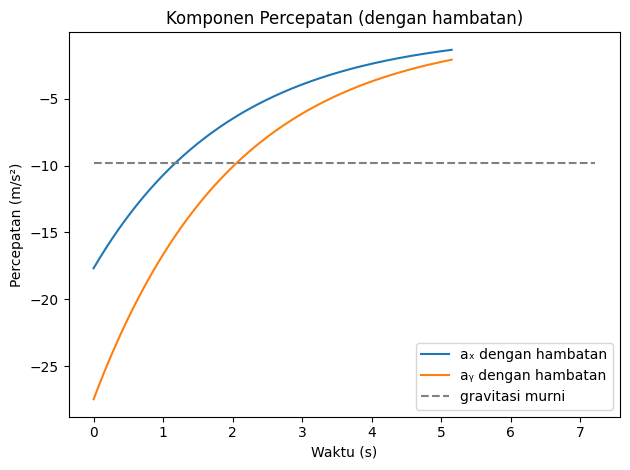

In [ ]:
# Plot percepatan ax, ay
#plt.subplot(3,1,3)
plt.plot(t_drag[:-1], ax_drag, label='aₓ dengan hambatan')
plt.plot(t_drag[:-1], ay_drag, label='aᵧ dengan hambatan')
plt.hlines(-9.8, t_no_drag[0], t_no_drag[-1], colors='gray', linestyles='--', label='gravitasi murni')
plt.xlabel('Waktu (s)')
plt.ylabel('Percepatan (m/s²)')
plt.title('Komponen Percepatan (dengan hambatan)')
plt.legend()

plt.tight_layout()
plt.show()

### **Pertanyaan**
1. Mengapa percepatan horizontal $a_x$ semakin kecil seiring waktu meskipun tidak ada gaya gravitasi di arah tersebut?
2. Perhatikan grafik percepatan tersebut. Menurut anda apakah grafik tersebut menunjukkan konsep yang benar? Apkah program yang dibuat sudah benar?

## **Perbandingan gerak peluru dengan $k$ berbeda**

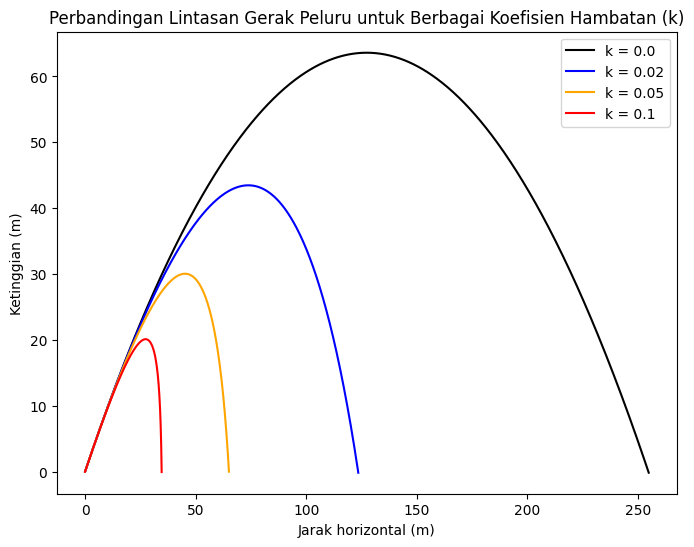

In [ ]:
v0 = 50
theta = 45
m = 0.1
dt = 0.01


k_values = [0.0, 0.02, 0.05, 0.1]
colors = ['black', 'blue', 'orange', 'red']

plt.figure(figsize=(8,6))

for k, c in zip(k_values, colors):
    xs, ys, vxs, vys, axs, ays, ts = projectile(v0, theta, k, m, g=9.8, dt=dt)
    label = f'k = {k}'
    plt.plot(xs, ys, color=c, label=label)

plt.title('Perbandingan Lintasan Gerak Peluru untuk Berbagai Koefisien Hambatan (k)')
plt.xlabel('Jarak horizontal (m)')
plt.ylabel('Ketinggian (m)')
plt.legend()
plt.show()

Jika nilai $k$ diperbesar, apa yang terjadi pada lintasan dan waktu tempuh?

1. Tambahkan fungsi untuk menghitung waktu benda mencapai titik tertinggi dan mencapai tanah.  Lalu bandingkan waktu untuk mencapai tanah kembali untuk kasus k = 0 dan k = 0.05. Apa yang dapat anda jelaskan?
2. Jika $\vec{F}_d = -k\vec{v}^2 $, plot lintasan parabola untuk beberapa variasi $k$, dan jelaskan apa yang anda amati?